# Analysis of the Population Estimates and Projections in California


   

 



This sample Python 3 notebook uses the Department of Finance in Americas California Population Projection by County, Age, Gender to analyse the following:
- What countys have the highest population
- Can we gain any insight on the population in California in the future
- Is there a change in the growth of the population on a year to year basis
- Is there a correlation with the older you are and the population
- Is there any difference between genders when it comes to population

This data can be accessed publicly at the website:

https://data.ca.gov/dataset/california-population-projection-county-age-gender-and-ethnicity

Import the required libraries that we are going to use later.

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline



## Data Collection

In [2]:
# Ensure the file exists
if not os.path.exists("Population.csv"):
    print("Missing dataset file")

Loading my CSV data using a Pandas DataFrame.

In [3]:
df = pd.read_csv("Population.csv")

Checking a sample of the data

In [4]:
df.head(5)

,fips,county,year,age,pop_female,pop_male,pop_total
0,6001,ALAMEDA,1970,0,8533,8671,17204
1,6001,ALAMEDA,1970,1,8151,8252,16403
2,6001,ALAMEDA,1970,2,7753,8015,15768
3,6001,ALAMEDA,1970,3,8018,8412,16430
4,6001,ALAMEDA,1970,4,8551,8648,17199


## Data Preparation

Obtaining a statistical overview of the data checking their types and how many values they contain

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474125 entries, 0 to 474124
Data columns (total 7 columns):
fips          474125 non-null int64
county        474125 non-null object
year          474125 non-null int64
age           474125 non-null int64
pop_female    474125 non-null int64
pop_male      474125 non-null int64
pop_total     474125 non-null int64
dtypes: int64(6), object(1)
memory usage: 25.3+ MB


After viewing this information the date seems very clean every column has a corresponding size to the others. 
All data types seem to be correct

##### Missing values
Checking to see if there is any null values in my dataset

In [6]:
df.isnull().sum()

fips          0
county        0
year          0
age           0
pop_female    0
pop_male      0
pop_total     0
dtype: int64

Data is clean with no mistakes nothing needed to be done about this

In [7]:
df['fips'] = df['fips'].astype(str)

Changed the column 'fips' to string as I may be able to utilize it later in the assignment, its value means little so changing it wont affect the dataset.

Checking change has been implemented

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474125 entries, 0 to 474124
Data columns (total 7 columns):
fips          474125 non-null object
county        474125 non-null object
year          474125 non-null int64
age           474125 non-null int64
pop_female    474125 non-null int64
pop_male      474125 non-null int64
pop_total     474125 non-null int64
dtypes: int64(5), object(2)
memory usage: 25.3+ MB


Creating an array of all the unique values in year county and fips that can be used later

In [9]:
df["year"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,
       2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
       2047, 2048, 2049, 2050])

In [10]:
df["county"].unique()

array(['ALAMEDA', 'ALPINE', 'AMADOR', 'BUTTE', 'CALAVERAS', 'COLUSA',
       'CONTRA COSTA', 'DEL NORTE', 'EL DORADO', 'FRESNO', 'GLENN',
       'HUMBOLDT', 'IMPERIAL', 'INYO', 'KERN', 'KINGS', 'LAKE', 'LASSEN',
       'LOS ANGELES', 'MADERA', 'MARIN', 'MARIPOSA', 'MENDOCINO', 'MERCED',
       'MODOC', 'MONO', 'MONTEREY', 'NAPA', 'NEVADA', 'ORANGE', 'PLACER',
       'PLUMAS', 'RIVERSIDE', 'SACRAMENTO', 'SAN BENITO', 'SAN BERNARDINO',
       'SAN DIEGO', 'SAN FRANCISCO', 'SAN JOAQUIN', 'SAN LUIS OBISPO',
       'SAN MATEO', 'SANTA BARBARA', 'SANTA CLARA', 'SANTA CRUZ', 'SHASTA',
       'SIERRA', 'SISKIYOU', 'SOLANO', 'SONOMA', 'STANISLAUS', 'SUTTER',
       'TEHAMA', 'TRINITY', 'TULARE', 'TUOLUMNE', 'VENTURA', 'YOLO', 'YUBA'], dtype=object)

In [11]:
df["fips"].unique()

array(['6001', '6003', '6005', '6007', '6009', '6011', '6013', '6015',
       '6017', '6019', '6021', '6023', '6025', '6027', '6029', '6031',
       '6033', '6035', '6037', '6039', '6041', '6043', '6045', '6047',
       '6049', '6051', '6053', '6055', '6057', '6059', '6061', '6063',
       '6065', '6067', '6069', '6071', '6073', '6075', '6077', '6079',
       '6081', '6083', '6085', '6087', '6089', '6091', '6093', '6095',
       '6097', '6099', '6101', '6103', '6105', '6107', '6109', '6111',
       '6113', '6115'], dtype=object)


## Analysing the Data

First to see which county has the highest population I am going to limit the results to that of countys that had a population over 23000 to give a true feel of the biggest countys.
Using a pie chart seems the best way to represent this as it will show a visual size representation.

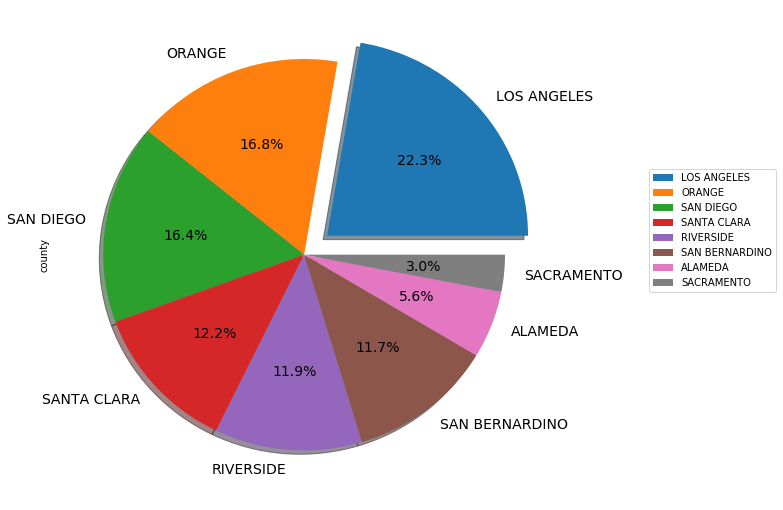

In [12]:
explode = (0.15, 0, 0, 0,0,0,0,0)
df["county"][df["pop_total"]>23000].value_counts().plot(kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(loc='right', bbox_to_anchor=(1.45, .55))

After looking at this pie chart it is evident Los Angeles has the highest population at 22.3% next to Orange and San Diego at around 16%.
To complete this graphic I used:
- explode to make the Los Angeles detatch from the chart
- value.count() to limit the results
- autopct to show percentages 
- bbox_to_anchor to anchor my legend

Next I looked to see if there is and will be much of a change in popualtion between 1970 and 2050

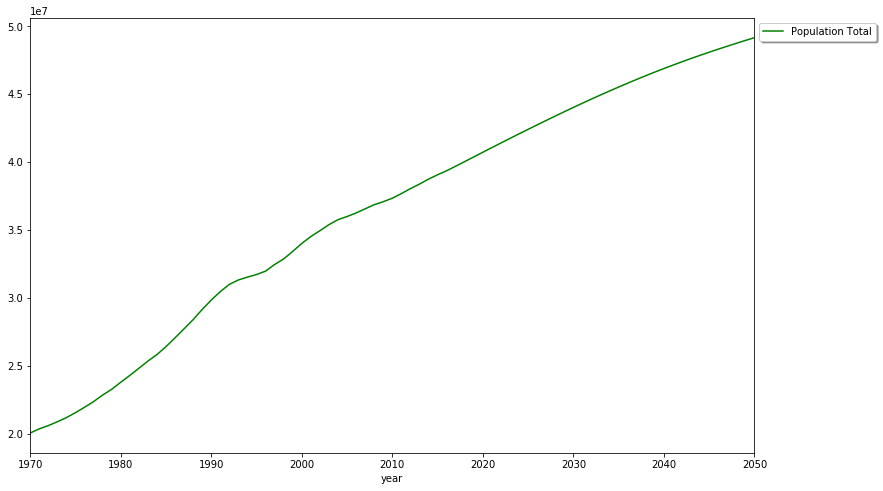

In [13]:
df_year = df.groupby('year')['pop_total'].sum()
fig = plt.figure(figsize=(26, 8))
gs = gridspec.GridSpec(100,100)
ax = fig.add_subplot(gs[:,50:120])
df_year.plot(label='Population Total',color='green')
plt.legend(bbox_to_anchor=(1, 1), shadow=True)

It is very clear from this graphic that the population of California is growing exponentially at an almost constant rate.
- I think checking the percent change in population might show some more information about this dataset

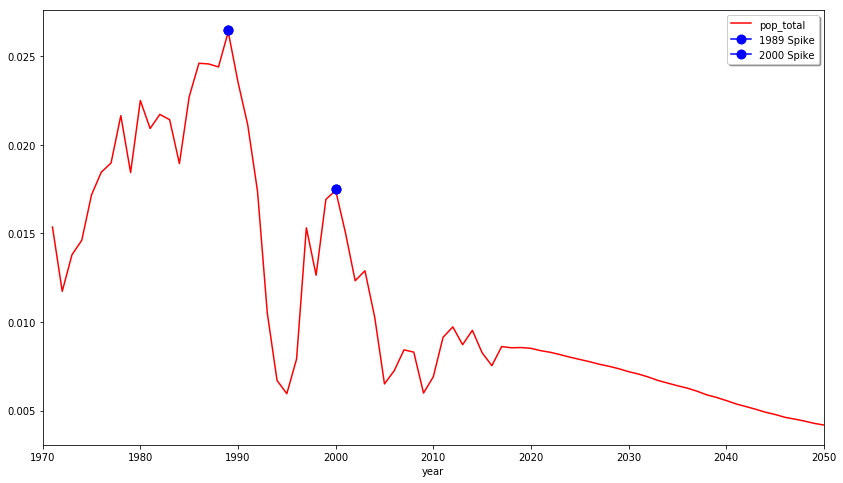

In [14]:
df_year.pct_change().plot(kind='line',figsize=(14, 8),color='red')
plt.plot([1989,1989], [0.0265, 0.0265],color='blue',marker="o",ms='9',label="1989 Spike")
plt.plot([2000,2000], [0.0175, 0.0175],color='blue',marker="o",ms='9',label="2000 Spike")
plt.legend(bbox_to_anchor=(1, 1), shadow=True)

After analsying this graph it can be seen that the percent change in population in California is slowly dropping. This could be due to over-population in certain areas or economic reasons.
- The high points marked in blue show spikes in population change that once again could be attributed to changes in California.
- I believe the gradual decline from 2020 to 2050 is incorrect as it is only predicited the information isn't as clear. It may be like this because it is expected population level increase will slow in the future because of over-popualtion

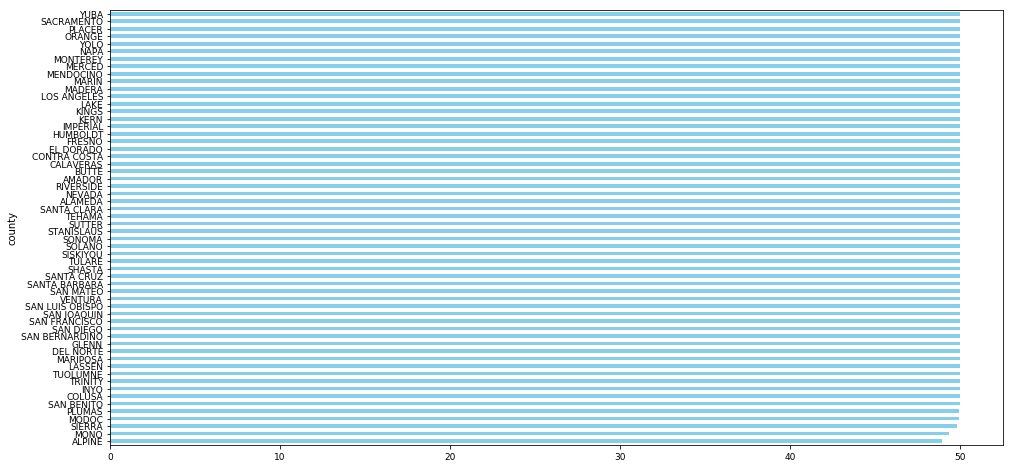

In [15]:
df_county = df.groupby('county')['age'].mean()
df_county = df_county.iloc[df_county.argsort()]
df_county.plot(kind='barh',color='skyblue',figsize=(16,8),fontsize=9,)

This graph shows all the countys where the mean age is less than 50 (the standard). At the bottom countys like Alpine, Mono, Sierra and Modoc have the lowest results. This could be attributed to the fact that these countys have a smaller population so its data is skwed when compared to others.

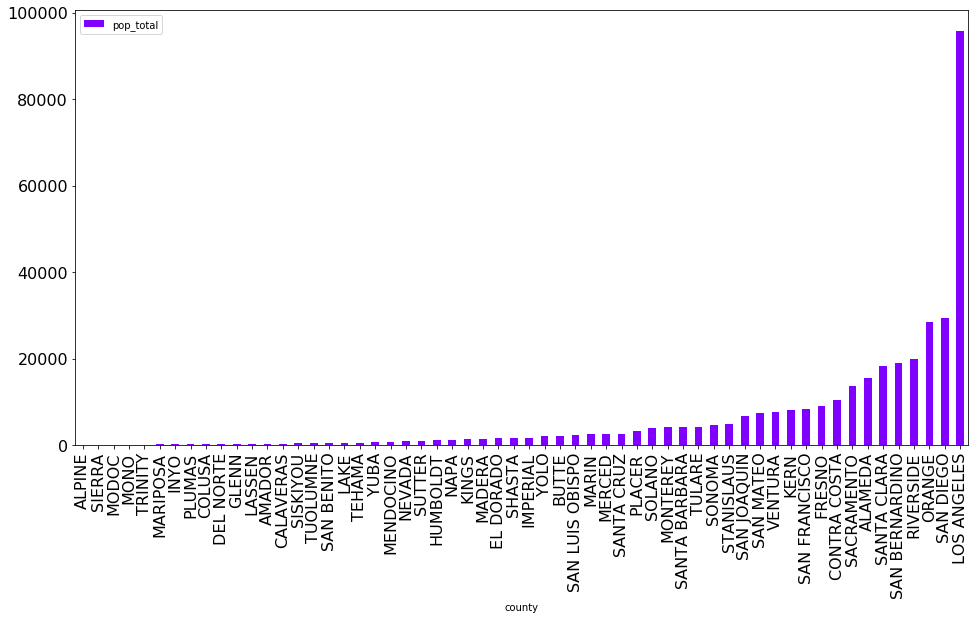

In [16]:
df_county2 = df.groupby('county')['pop_total'].mean()
df_county2 = df_county2.iloc[df_county2.argsort()]
df_county2.plot(kind='bar',cmap='rainbow',figsize=(16,8),fontsize=16)
plt.legend()

This graph shows a total representation of the total population of every county compared to eachother. It is obvious now why some data like Alpines was skwed in the previous graphic

###### Next I decided to compare age to population to see if any intestresting information could be drawn

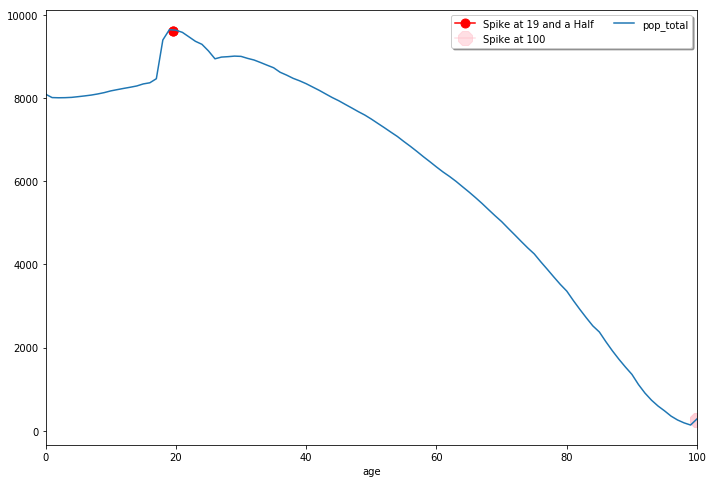

In [17]:
df_age = df.groupby('age')['county','pop_total'].mean()
fig = plt.figure(figsize=(26, 8))
gs = gridspec.GridSpec(100,100)
ax = fig.add_subplot(gs[:,55:104])
plt.plot([19.5,19.5], [9600, 9600],color='red',marker="o",ms='9',label="Spike at 19 and a Half")
plt.plot([100,100], [260, 260],color='pink',marker="8",ms='16',label="Spike at 100",alpha=0.5)
df_age.plot(ax=ax)
plt.legend( bbox_to_anchor=(1, 1),  shadow=True, ncol=2)

Some interesting information can be drawn from this line chart
- An obvious conclusion can be made with this graph that the population decreases as people get older they die but it is good to show this.
- At the first spike marked in red there seems to be an increase at the age of 18-22, I believe this is because of people moving to California to work from other countrys like Ireland. This would explain why it has spiked so high. This could also be because people from all over the world are travelling to Los Angeles to presure the "Hollywood Dream" in the movie industry.
- Next the spike marked in pink shows a spike in population at 100. I think this was done by data collectors at the goverment. I believe that they took every person that was 100+ and made them 100 in the dataset. This is one of the only discrepancies I have spotted in this dataset but it makes sense with their life expectancy at that age.

Next I want to compare males and females and their populations to see if any information can be drawn

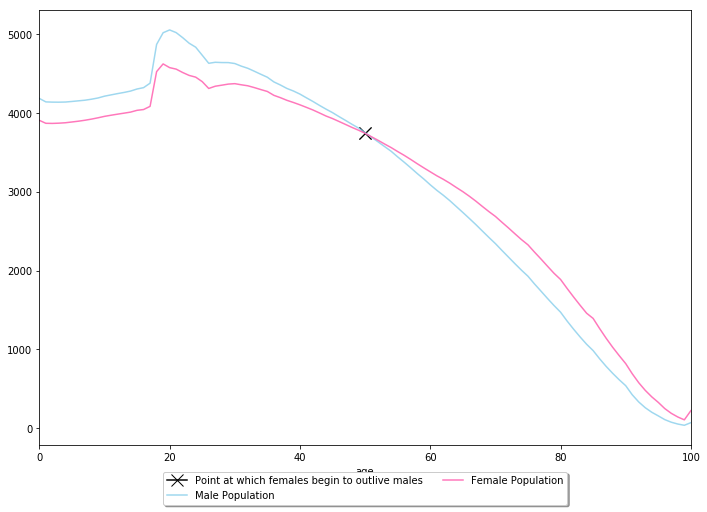

In [18]:
df_male = df[['age','pop_male']]
df_female = df[['age','pop_female']]
df_male.set_index('age')
df_female.set_index('age')
df_female = df_female.groupby('age')['pop_female'].mean()
df_male = df_male.groupby('age')['pop_male'].mean()
df_gender = pd.concat([df_male, df_female], axis=1)
df_gender

fig = plt.figure(figsize=(26, 8))
gs = gridspec.GridSpec(100,100)
ax = fig.add_subplot(gs[:,55:104])
plt.plot([50,50], [3750, 3750],color='black',marker="x",ms='12',label="Point at which females begin to outlive males")
df_gender['pop_male'].plot(kind='line', color='skyblue', ax=ax, alpha=0.8,label='Male Population')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
df_gender['pop_female'].plot(kind='line', color='#FF69B4', ax=ax, alpha=0.9,label='Female Population')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

A vast array of information can be drawn from this line plot. It can be said that:
- Between the ages of 0 and 40 the amount of men in California is much more than females.
- At the intrim point of 50 the population of both females and males are very similar.
- Females have a longer life expectancy than males even though they have less of a population this is clear.
- Once a male reaches 50 his life expectancy drops dramatically, this is an analysis that can be backed up by medical records.
- Once again a spike in population can be seen at 18-22 in California in both sexes.

Next I want to look and see if its possible to predict the male population if you know the female population in a dataset

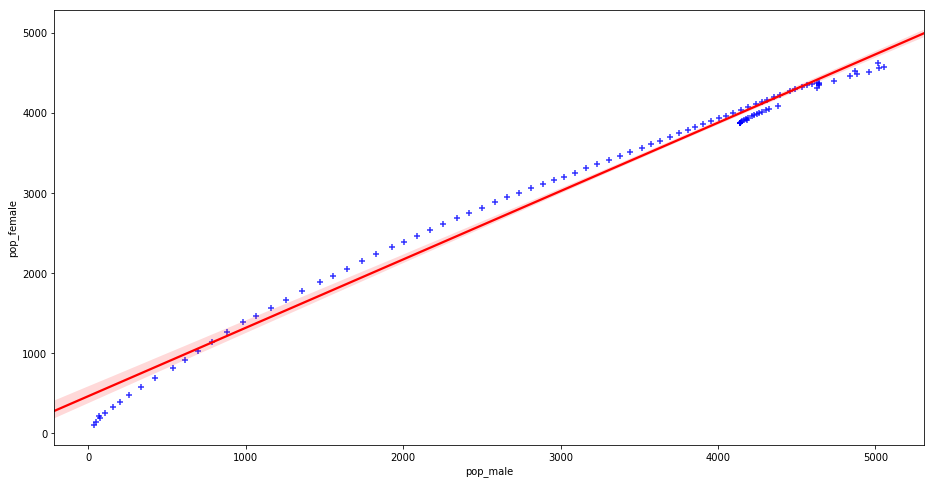

In [19]:
fig = plt.figure(figsize=(26, 8))
gs = gridspec.GridSpec(100,100)

ax = fig.add_subplot(gs[:,40:130])
sns.regplot(df_gender['pop_male'],df_gender['pop_female'],marker="+",scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As you can see above I achieved this goal of being able to predict the oppoisite sexes population when you have one by creating a line of best fit. To complete this I imported seaborn to my notebook and it works well. If you pick any point on the line of best fit is almost perfect. And like with most lines of best bit the more population given the more accurate the guess is as can be seen in the top right of the graph.

### Possible Further Analysis

In this dataset there are very little limitations some further analysis I could have completed if I had more time would be:
- Splitting the data age into groups of 10's and see if there are differences in each age group
- Finding the average age in each county and see if any information can be drawn, ie: Los Angeles having a lower age.
- Comparing male and females in different countys seeing if some countys have more than others